In [1]:
from ultralytics import YOLO
import os

In [2]:
# Load the nano model
model = YOLO('yolov8n.pt')

In [3]:
path_to_data = 'C:/Users/zebzi/Documents/School/Master_Year/CSCI 5525/Project/YOLOv8/'
epoch = 30

results = model.train(
    mode='detect',
    data=path_to_data + 'data.yaml',
    imgsz=416,
    epochs=epoch,
    batch=8,
    name=path_to_data + f'{epoch}_epochs_result'
)

New https://pypi.org/project/ultralytics/8.0.222 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.221 🚀 Python-3.10.5 torch-2.1.1+cpu CPU (AMD Ryzen 7 6800H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/zebzi/Documents/School/Master_Year/CSCI 5525/Project/YOLOv8/data.yaml, epochs=30, patience=50, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=30_epochs_result, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

train: Scanning C:\Users\zebzi\Documents\School\Master_Year\CSCI 5525\Project\YOLOv8\train_data\labels.cache... 606 images, 0 backgrounds, 0 corrupt: 100%|██████████| 606/606 [00:00<?, ?it/s]

train: WARNING ⚠️ C:\Users\zebzi\Documents\School\Master_Year\CSCI 5525\Project\YOLOv8\train_data\images\26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.0fe973299ff9e73874d9e684cba4e406.jpg: 1 duplicate labels removed
train: WARNING ⚠️ C:\Users\zebzi\Documents\School\Master_Year\CSCI 5525\Project\YOLOv8\train_data\images\26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.5e1a9d49ad09f5a7549225a05e1f66a6.jpg: 1 duplicate labels removed
train: WARNING ⚠️ C:\Users\zebzi\Documents\School\Master_Year\CSCI 5525\Project\YOLOv8\train_data\images\26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.bb226be189ee3a6399fbbd5080852e5b.jpg: 1 duplicate labels removed



val: Scanning C:\Users\zebzi\Documents\School\Master_Year\CSCI 5525\Project\YOLOv8\valid_data\labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]


Plotting labels to C:\Users\zebzi\Documents\School\Master_Year\CSCI 5525\Project\YOLOv8\30_epochs_result\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to C:\Users\zebzi\Documents\School\Master_Year\CSCI 5525\Project\YOLOv8\30_epochs_result
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.744      3.898      1.193         92        416: 100%|██████████| 76/76 [00:53<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all         58        386      0.409      0.224      0.289        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G       1.42      2.243      1.004         58        416: 100%|██████████| 76/76 [00:51<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all         58        386      0.618      0.365      0.471      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G       1.33      1.699      1.001         86        416: 100%|██████████| 76/76 [00:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all         58        386      0.451      0.632      0.583      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G       1.28      1.534     0.9742         93        416: 100%|██████████| 76/76 [00:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all         58        386      0.562      0.669      0.725      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      1.235      1.376     0.9679         75        416: 100%|██████████| 76/76 [00:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all         58        386      0.673      0.744      0.798       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.195      1.207     0.9567        130        416: 100%|██████████| 76/76 [00:51<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all         58        386      0.805      0.829        0.9      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      1.186      1.118     0.9595         47        416: 100%|██████████| 76/76 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         58        386      0.842      0.844      0.942      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      1.154      1.083     0.9432         83        416: 100%|██████████| 76/76 [00:51<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all         58        386      0.901      0.886      0.961       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      1.097     0.9762     0.9343         98        416: 100%|██████████| 76/76 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         58        386      0.902      0.897      0.967      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.107     0.9215       0.94         57        416: 100%|██████████| 76/76 [00:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         58        386      0.937      0.915      0.966       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/30         0G      1.073     0.8756     0.9233        108        416: 100%|██████████| 76/76 [00:51<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         58        386      0.919      0.957      0.976      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/30         0G       1.06     0.8459     0.9294         63        416: 100%|██████████| 76/76 [00:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         58        386      0.947      0.963       0.98      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      1.088     0.8377     0.9375        157        416: 100%|██████████| 76/76 [00:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         58        386      0.967      0.953      0.978      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/30         0G      1.051     0.8055     0.9297        114        416: 100%|██████████| 76/76 [00:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         58        386      0.945      0.945      0.977      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      1.039     0.7937      0.926         91        416: 100%|██████████| 76/76 [00:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         58        386      0.953      0.975       0.98      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G     0.9968     0.7423     0.9201         84        416: 100%|██████████| 76/76 [00:50<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         58        386      0.956       0.96      0.981      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      1.006     0.7442      0.925         68        416: 100%|██████████| 76/76 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         58        386      0.947      0.976      0.982      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      1.002     0.7227     0.9177         58        416: 100%|██████████| 76/76 [00:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         58        386       0.97      0.971      0.981      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      1.019     0.7428     0.9294         59        416: 100%|██████████| 76/76 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         58        386       0.97       0.98      0.985      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.9752     0.6996     0.9167        101        416: 100%|██████████| 76/76 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         58        386      0.976      0.972      0.986       0.76


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.9321     0.6842     0.9237         48        416: 100%|██████████| 76/76 [00:49<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         58        386      0.974      0.959      0.984      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.9442     0.6523     0.9238         37        416: 100%|██████████| 76/76 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all         58        386      0.958      0.962      0.985      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      0.916     0.6321     0.9121         62        416: 100%|██████████| 76/76 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         58        386      0.973      0.978      0.984      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G     0.9115      0.623     0.9214         25        416: 100%|██████████| 76/76 [00:49<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         58        386      0.966      0.973      0.985      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      0.909     0.6092     0.9124         52        416: 100%|██████████| 76/76 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         58        386      0.968      0.975      0.985      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.9076      0.599      0.914         93        416: 100%|██████████| 76/76 [00:49<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         58        386      0.971      0.975      0.985      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.8887     0.5882     0.9049         92        416: 100%|██████████| 76/76 [00:49<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         58        386      0.975      0.969      0.986      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.8731     0.5898     0.9095         76        416: 100%|██████████| 76/76 [00:49<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         58        386      0.974      0.977      0.986      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      0.874     0.5812     0.9155         23        416: 100%|██████████| 76/76 [00:49<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         58        386      0.971      0.976      0.985      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G      0.869     0.5732     0.8986         51        416: 100%|██████████| 76/76 [00:49<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         58        386      0.969      0.978      0.985      0.788



30 epochs completed in 0.444 hours.
Optimizer stripped from C:\Users\zebzi\Documents\School\Master_Year\CSCI 5525\Project\YOLOv8\30_epochs_result\weights\last.pt, 6.2MB
Optimizer stripped from C:\Users\zebzi\Documents\School\Master_Year\CSCI 5525\Project\YOLOv8\30_epochs_result\weights\best.pt, 6.2MB

Validating C:\Users\zebzi\Documents\School\Master_Year\CSCI 5525\Project\YOLOv8\30_epochs_result\weights\best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.10.5 torch-2.1.1+cpu CPU (AMD Ryzen 7 6800H with Radeon Graphics)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]


                   all         58        386      0.969      0.978      0.985      0.788
          black-bishop         58         22          1        0.9      0.966      0.718
            black-king         58         29          1      0.979      0.995      0.853
          black-knight         58         30      0.971          1      0.995      0.812
            black-pawn         58         77      0.991          1      0.995      0.787
           black-queen         58         11      0.889          1      0.995      0.785
            black-rook         58         28          1      0.963      0.995       0.78
          white-bishop         58         22      0.877      0.974      0.953      0.769
            white-king         58         29          1          1      0.995      0.801
          white-knight         58         19      0.923          1      0.972      0.777
            white-pawn         58         77      0.985          1      0.995      0.784
           white-quee

In [1]:
a = model.predict(
    source = "C:/Users/zebzi/Downloads/Chess Pieces.v24-416x416_aug.yolov8/train/images/ca869123d8a0cbcc6e54f4a445e5a78a_jpg.rf.5a9d4bcaf2ccf730c794bb7d57d77524.jpg",
    conf=0.25
)

# print(a[0])

NameError: name 'model' is not defined

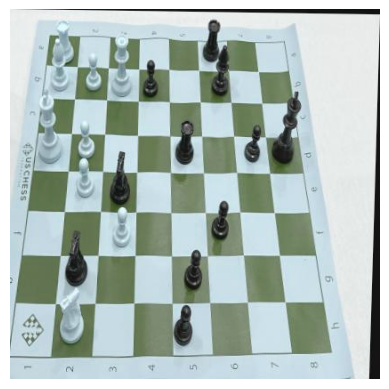

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([12., 10.,  9.,  4., 10.,  4.,  4.,  7.,  8.,  2.,  6., 10.,  1., 10.,  3.,  6., 11.,  3.,  4.,  4.])
conf: tensor([0.9631, 0.9621, 0.9543, 0.9406, 0.9298, 0.9255, 0.9235, 0.9230, 0.9215, 0.9211, 0.9196, 0.9182, 0.8982, 0.8966, 0.8960, 0.8745, 0.8482, 0.8302, 0.8224, 0.7826])
data: tensor([[ 47.9841,   7.1804,  76.0742,  64.1776,   0.9631,  12.0000],
        [ 82.4988,  46.0262, 107.4233,  96.1810,   0.9621,  10.0000],
        [ 54.7419, 308.8456,  90.5725, 380.0115,   0.9543,   9.0000],
        [225.3905, 210.3527, 251.6559, 262.9586,   0.9406,   4.0000],
        [113.0793, 219.6307, 140.3017, 271.3705,   0.9298,  10.0000],
        [194.9130, 264.7781, 221.8309, 318.6164,   0.9255,   4.0000],
        [262.0742, 126.1564, 286.2899, 176.4634,   0.9235,   4.0000],
        [ 41.5891,  29.1563,  70.4357,  95.5754,   0.9230,   7.0000],
        [ 27.4430,  84.3036,  64.9049, 177.8116,   0.9215,   8.0000],
        [292.8778

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(a[0].orig_img)
plt.axis('off')  # Turn off axis numbers
plt.show()

print(a[0].boxes)


cropped_image.shape = (57, 29, 3)
cropped_image.shape = (50, 25, 3)
cropped_image.shape = (72, 36, 3)
cropped_image.shape = (52, 26, 3)
cropped_image.shape = (52, 27, 3)
cropped_image.shape = (54, 27, 3)
cropped_image.shape = (50, 24, 3)
cropped_image.shape = (66, 29, 3)
cropped_image.shape = (93, 37, 3)
cropped_image.shape = (90, 38, 3)
cropped_image.shape = (59, 28, 3)
cropped_image.shape = (49, 25, 3)
cropped_image.shape = (64, 26, 3)
cropped_image.shape = (52, 28, 3)
cropped_image.shape = (71, 33, 3)
cropped_image.shape = (57, 26, 3)
cropped_image.shape = (80, 31, 3)
cropped_image.shape = (67, 30, 3)
cropped_image.shape = (53, 26, 3)
cropped_image.shape = (50, 24, 3)


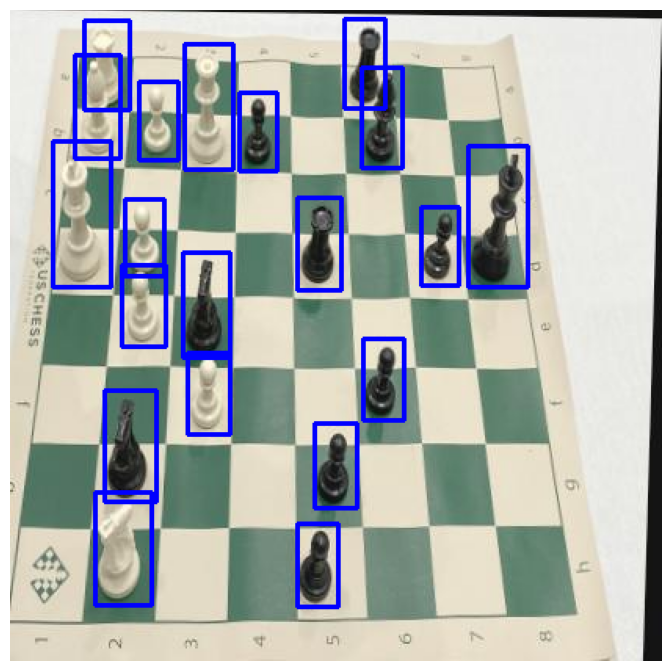

In [6]:
import cv2
import numpy as np

num_boxes = len(a[0].boxes.xywhn)
image = a[0].orig_img
copy_image = np.copy(image)

plt.figure(figsize=(200, 100))

for i in range(num_boxes):
    bbox = a[0].boxes[i].xywhn
    img_h, img_w = a[0].orig_shape

    x_center, y_center, width, height = bbox[0][0], bbox[0][1], bbox[0][2], bbox[0][3]

    x1 = int((x_center - width / 2) * img_w)
    y1 = int((y_center - height / 2) * img_h)
    x2 = int((x_center + width / 2) * img_w)
    y2 = int((y_center + height / 2) * img_h)

    cv2.rectangle(image, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)

    temp_image = np.copy(copy_image)
    cv2.rectangle(temp_image, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)

    # plt.subplot(1, num_boxes, i + 1)
    cropped_image = temp_image[y1:y2, x1:x2]
    print(f"{cropped_image.shape = }")
    # plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    # plt.axis('off')



plt.subplot(1, num_boxes, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()